# The Day and Hunag 1990 Model

https://www.sciencedirect.com/science/article/abs/pii/016726819090061H

In [2]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## The Model 

In [3]:
def day_hunag(T,c):
    m = 0 # lower price bound
    M = 1 # higher price bound
    d1 = 0.5 #
    d2 = 0.5 #
    a = 0.2 #
    b = 0.88 #
    u = .5 #
    v = .5 #
    
    
    
    # Preallocation
    p = np.zeros(T)
    p[0] = 0.499999#
   
    
   # Chance Function 
    def chance(p):
        if p>M:
            return 0
        elif p<m:
            return 0
        else:
            return (p-m)**(-d1) * (M-p)**(-d2)


    # Market Maker price function
    for t in range(T-1):
        p[t+1] = p[t] + c*(a*(u-p[t])*chance(p=p[t]) + b*(p[t]-v)) + np.random.normal(0,0.01)

    return(p)

## Plots for the Stylized Facts of the generated model price series 

c:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


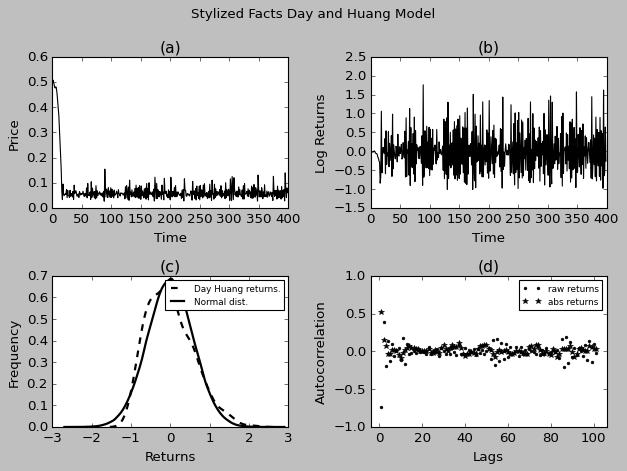

In [4]:
plt.style.use('classic')

price = day_hunag(400,0.6)

r = np.zeros(len(price))
for t in range (len(price)):
    r[t] = np.log(price[t]) - np.log(price[t-1])

r_abs = np.abs(r)

r_mean = r.mean()
r_var = r.var()

pseudo_r = np.random.normal(r_mean,np.sqrt(r_var), len(price)*1000)

fig, ([ax0,ax1],[ax2,ax3]) = plt.subplots(2,2)
fig.suptitle('Stylized Facts Day and Huang Model', fontsize=12)
ax0.plot(price,color='black',linewidth=1)
ax0.set_title('(a)', fontsize=14)
ax0.set_xlabel('Time')
ax0.set_ylabel('Price')

ax1.plot(r, color = 'black')
ax1.set_title('(b)', fontsize=14)
ax1.set_xlabel('Time',fontsize=12)
ax1.set_ylabel('Log Returns',fontsize=12)



sns.distplot(r,hist = False, kde = True, kde_kws = {'linewidth': 2,'linestyle':'--'},ax=ax2, label='Day Huang returns.', color='black')
sns.distplot(pseudo_r,hist = False, kde = True, kde_kws = {'linewidth': 2},ax=ax2, label = 'Normal dist.', color = 'black')
ax2.set(xlabel='Returns', ylabel = 'Frequency', title = '(c)')
ax2.legend(loc=1, prop={'size':8})
plt.tight_layout()


sm.graphics.tsa.plot_acf(r, lags=101, ax= ax3,use_vlines= False, alpha = None ,zero = False ,color = 'black' ,marker = '.', label = 'raw returns')
sm.graphics.tsa.plot_acf(r_abs, lags=101, ax= ax3, use_vlines = False , alpha = None , zero = False, color='black', marker = '*', label = 'abs returns')
ax3.set(xlabel='Lags', ylabel = 'Autocorrelation')
ax3.set_title('(d)',fontsize = 14)
ax3.legend(loc=1, prop={'size':8})

#plt.savefig('Day_Huang_Figure.jpeg')